# Exercise 3 - part 1: Association Test
### Chosen datasets: ```Blood stem cell (GSE18067)```, ```Erythroid (GSE18067)```

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Import data

In [2]:
df_eryt = pd.read_csv('./data/step3_erythroid_preprocessed_expression_data.csv')
df_stem = pd.read_csv('./data/step3_stem_preprocessed_expression_data.csv')
df_un_gen = pd.read_csv('./data/step3_unique_genotypes.csv')

In [3]:
# Drop the column from eryt data
df_eryt_no_symbol = df_eryt.drop('Symbol', axis=1)

# Drop the columns from genotypes
df_un_gen_only_BXD = df_un_gen.drop(['Unnamed: 0', 'Locus', 'Chr_Build37', 'Build37_position'], axis=1)

In [4]:
# Get the column names of the two dataframes
columns_df_without_symbol = df_eryt_no_symbol.columns
columns_df_un_gen_only_BXD = df_un_gen_only_BXD.columns

# Find the common columns
common_columns = columns_df_without_symbol.intersection(columns_df_un_gen_only_BXD)

# Filter the dataframes by the common columns
df_eryt_no_symbol_filtered = df_eryt_no_symbol[common_columns]
df_un_gen_only_BXD_filtered = df_un_gen_only_BXD[common_columns]

In [5]:
# Replace 'B' with 0 and 'D' with 1 in df_un_gen_only_BXD_filtered
# df_un_gen_only_BXD_filtered.replace('B' or 'b', 0, inplace=True)
# df_un_gen_only_BXD_filtered.replace('D' or 'd', 1, inplace=True)

/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_2594/461633654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_un_gen_only_BXD_filtered.replace('B' or 'b', 0, inplace=True)
/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_2594/461633654.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_un_gen_only_BXD_filtered.replace('D' or 'd', 1, inplace=True)
/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_2594/461633654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [5]:
# remove rows with NaN values
df_eryt_no_symbol_filtered.dropna(inplace=True)
df_un_gen_only_BXD_filtered.dropna(inplace=True)

/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_4011/3128984312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_un_gen_only_BXD_filtered.dropna(inplace=True)


In [6]:
# remove columns with 'U' values
df_un_gen_only_BXD_filtered = df_un_gen_only_BXD_filtered.loc[:,~df_un_gen_only_BXD_filtered.isin(['U']).any()]

In [9]:
# Select the row from eryt data
eryt_row = df_eryt_no_symbol_filtered.iloc[0]
eryt_array = np.array(eryt_row)

# Select the row from genotypes
gen_row = df_un_gen_only_BXD_filtered.iloc[0]
gen_array = np.array(gen_row)

# Replace 'B' with 0 and 'D' with 1 in gen_array
gen_array[gen_array == 'B'] = 0
gen_array[gen_array == 'D'] = 1
gen_array = gen_array.astype(int)

Association test - using linear regression model, first try for 1 row each

In [10]:
# perform linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(gen_array, eryt_array)

In [11]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(gen_array, eryt_array)

# Print the results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R value: {r_value}')
print(f'P value: {p_value}')
print(f'Standard error: {std_err}')

Slope: 0.36185861814285714
Intercept: 8.895041731000001
R value: 0.1867118151503141
P value: 0.47303927237773613
Standard error: 0.4916050715067634


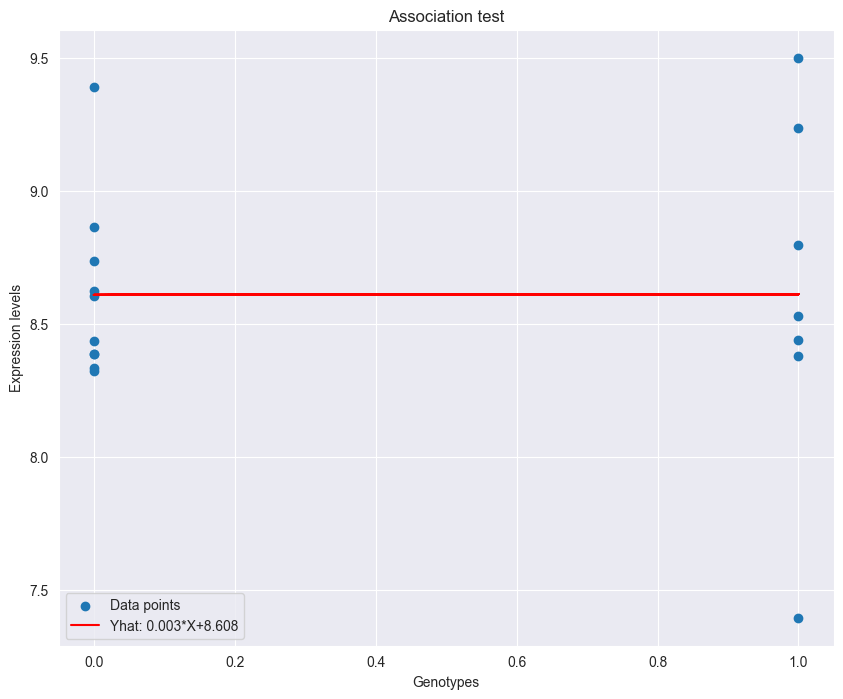

In [25]:
# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(gen_array, eryt_array)
plt.plot(gen_array, slope * gen_array + intercept, color='red')
plt.legend(['Data points', f'Yhat: {round(slope,3)}*X+{round(intercept,3)}', 'Regression line', f'R^2: {round(r_value**2, 3)}'], loc='lower left')
plt.xlabel('Genotypes')
plt.ylabel('Expression levels')
plt.title('Association test')
plt.show()

Association test - using linear regression model, for all rows

In [ ]:
# Initialize a dataframe to store the p-values
p_values = pd.DataFrame(index=df_eryt_no_symbol_filtered.columns, columns=df_un_gen_only_BXD_filtered.columns)

# Get the total number of iterations for progress tracking
total_iterations = len(df_eryt_no_symbol_filtered) * len(df_un_gen_only_BXD_filtered)

# Initialize a counter for progress tracking
progress_counter = 0

# Iterate over all pairs of columns
for i in range(len(df_eryt_no_symbol_filtered)):
    # convert the row to a numpy array
    row1 = df_eryt_no_symbol_filtered.iloc[i]
    row1_array = np.array(row1)
    for j in range(len(df_un_gen_only_BXD_filtered)):
        # convert the row to a numpy array
        row2 = df_un_gen_only_BXD_filtered.iloc[j]
        row2_array = np.array(row2)
        # Replace 'B' with 0 and 'D' with 1 in gen_array
        row2_array[(row2_array == 'B') | (row2_array == 'b')] = 0
        row2_array[(row2_array == 'D') | (row2_array == 'd')] = 1
        # convert the array to int
        row2_array = row2_array.astype(int)
        
        # Perform linear regression on each pair of values and store the p-values
        p_value = stats.linregress(row1_array, row2_array)[3] # 3rd value is the p-value

        # Store the p-value in the dataframe
        p_values.at[i, j] = p_value
        
        # Update the progress counter
        progress_counter += 1
        print(f'Progress: {progress_counter}/{total_iterations}')

# Add information to the column names
p_values.columns = [f'{col}_SNP' for col in p_values.columns]
p_values.index = [f'{idx}_expression' for idx in p_values.index]

print(p_values)

In [ ]:
# save the p_values to a csv file
p_values.to_csv('./data/association_test_p_values.csv')

In [6]:
# Load the p_values from zip file
p_values = pd.read_csv('./data/association_test_p_values.csv', index_col=0)

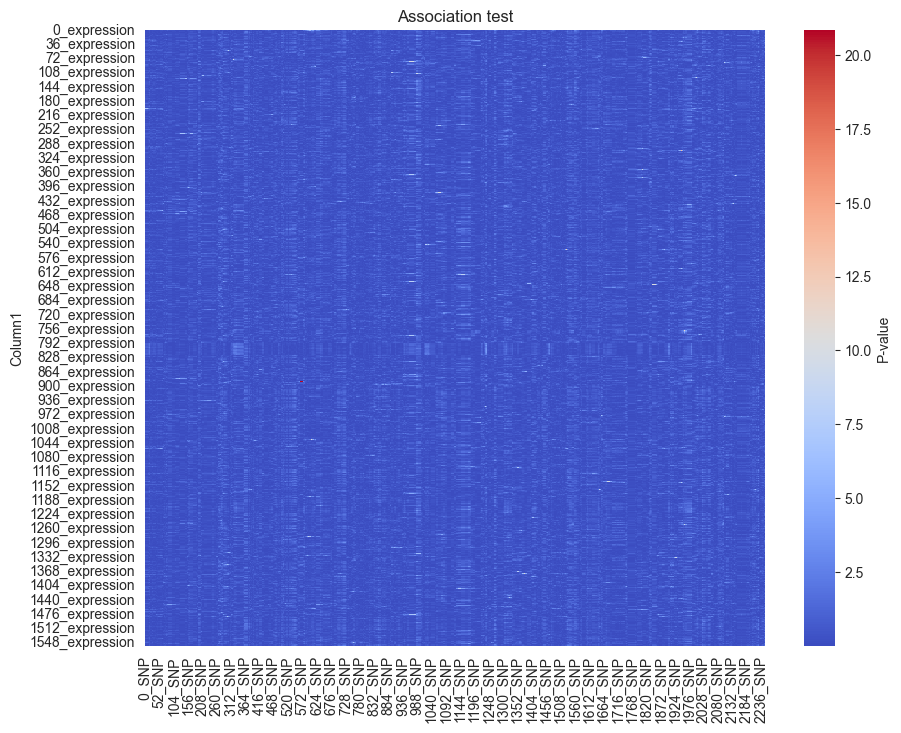

In [14]:
# create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(p_values<0.001, cmap='coolwarm', cbar_kws={'label': 'P-value'})
plt.title('Association test')
plt.show()